# **Customer Churn Prediction**

In [ ]:
#113 video from course

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/CustomerChurn (1).csv')

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape  #7043 records and 21 columns

(7043, 21)

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
#check the descriptive statistics of numeric values
df.describe()  #gives only the data type that arent object

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior Citizen is actually categorical here the 25%-50%-75% distribution is not proper

75% customers have tenure less than 55 months

Average monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
df['Churn'].value_counts()/len(df)*100

,count
Churn,
No,73.463013
Yes,26.536987


Text(0.5, 1.02, 'Count of Customers Churn per category')

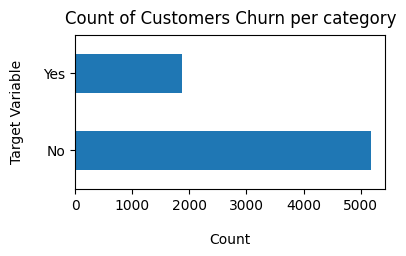

In [ ]:
df['Churn'].value_counts().plot(kind='barh', figsize=(4,2))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Target Variable', labelpad=14 )
plt.title('Count of Customers Churn per category', y=1.02)

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Data is highly imbalanced ratio:73.27


so we analyze the data with other features while taking the target values separately to get some insights

In [ ]:
#concise summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


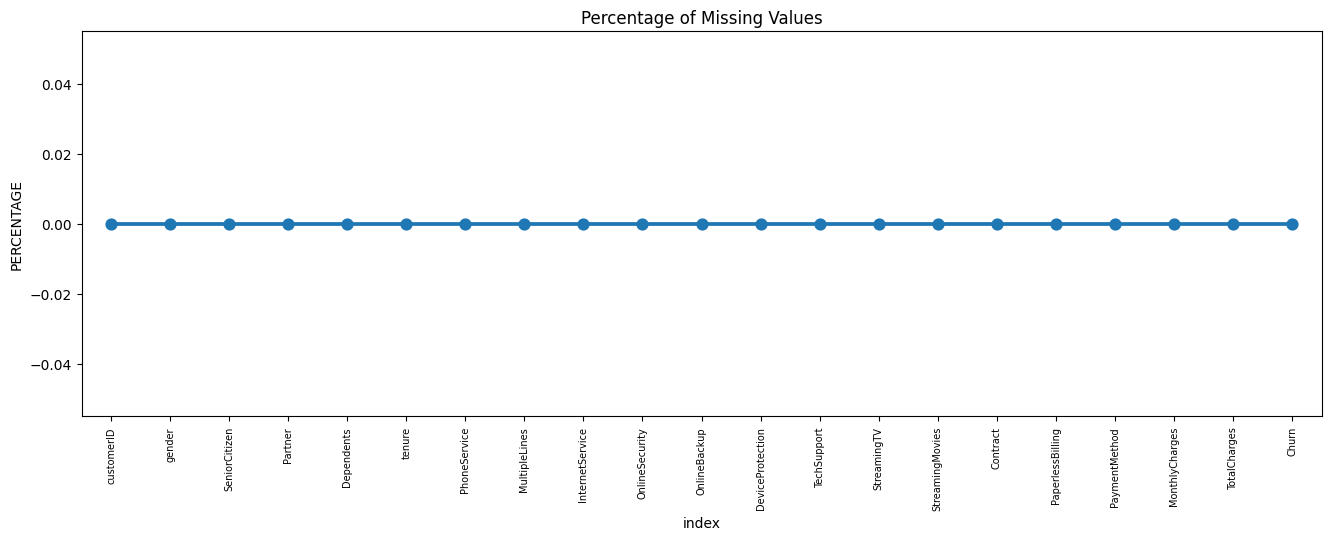

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize = 7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

Missing Data - Initial Intuition

here we dont have any missing data



# Data Cleaning

In [ ]:
  #create a copy of base data for manipulation and processing

  new_df=df.copy()

In [ ]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#total charges should be numeric amount. lets convert it to numerical data type

new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df.info()
new_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#as we can see 11 missing values in TotalCharges column. lets check these records

new_df.loc[new_df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Missing Value Treatement

since the % of these records compared to total dataset is very low that is 0.15%, it is safe to ignore them from further processing.

In [ ]:
#removing missing values

new_df.dropna(how='any', inplace=True)

Divide customers into bins based on tenure. that is for tenure <12 months: assign a tenure group if 1-12, for tenure between 1 and so on

In [ ]:
#get the max tenure

print(new_df['tenure'].max())

72


In [ ]:
labels = ["{0} - {1}". format(i,i+11) for i in range(1,72,12)]
print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [ ]:
#group the tenure in bins of 12 months

labels = ["{0} - {1}". format(i,i+11) for i in range(1,72,12)]

new_df['tenure_group']=pd.cut(new_df.tenure, range(1,80,12), right=False, labels=labels)

In [ ]:
new_df['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


# Remove Columns not required for processing

In [ ]:
#drop column that arent gonna give me insights

new_df.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)

In [ ]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration/Analysis

- we assumed that our data is already cleaned now we start with different types of analysis

- Plot distribution of individual predictors by churn

Univariate Analysis

In [ ]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [ ]:
#gives the percentage count of the churn  or not churn rate
#almost 26% is the churn rate

new_df.Churn.value_counts()/len(new_df)*100

,count
Churn,
No,73.421502
Yes,26.578498


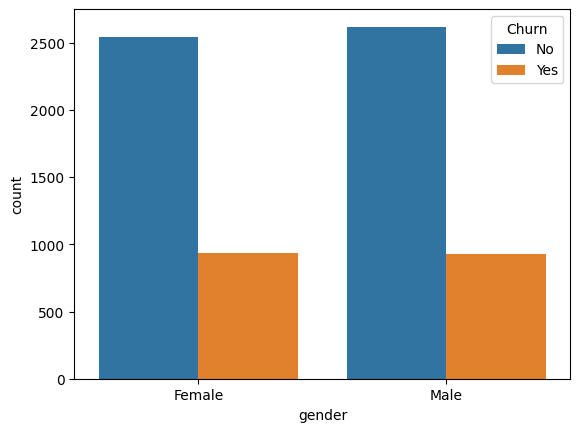

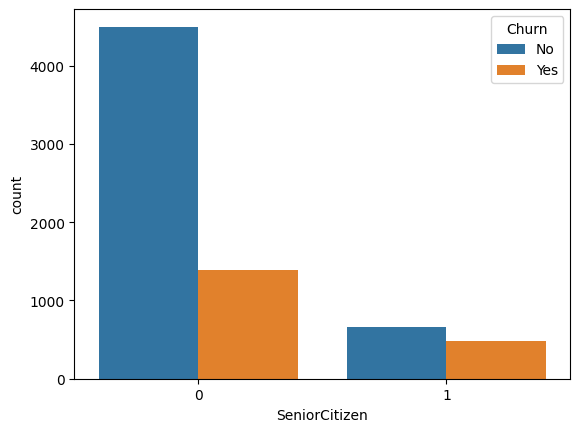

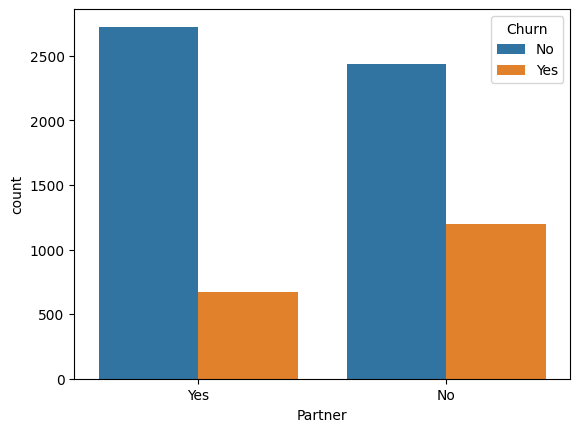

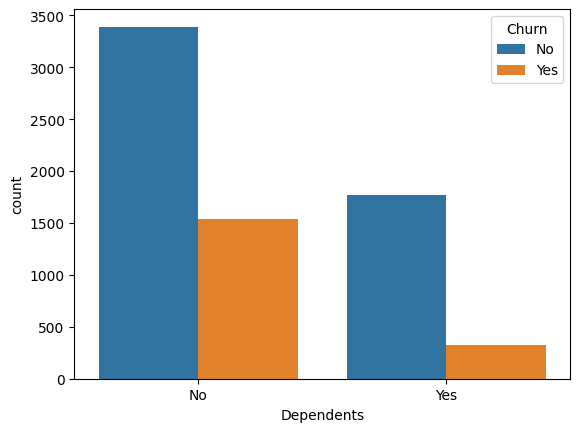

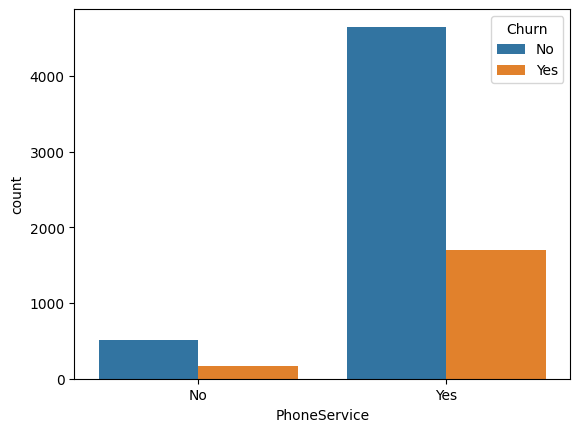

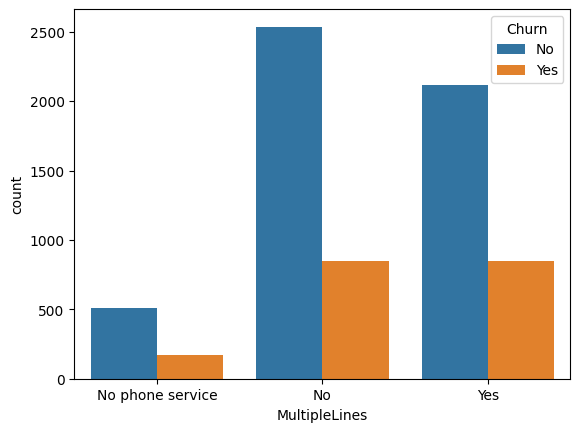

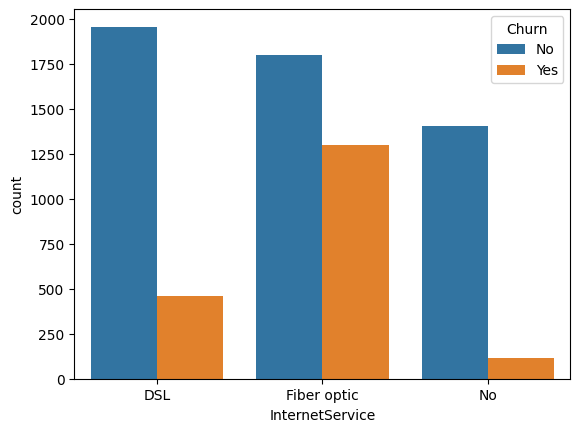

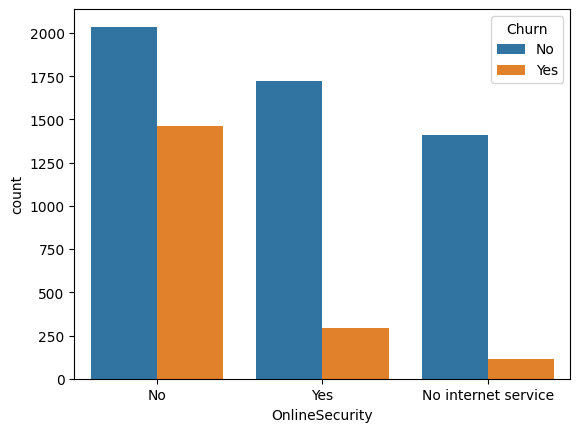

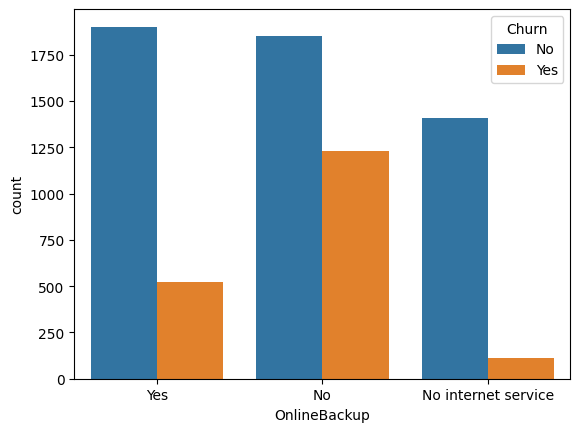

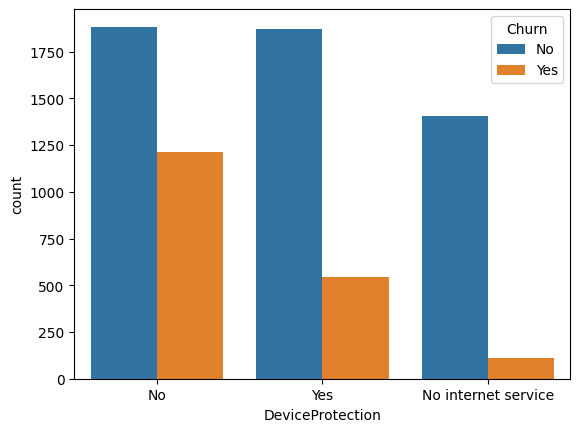

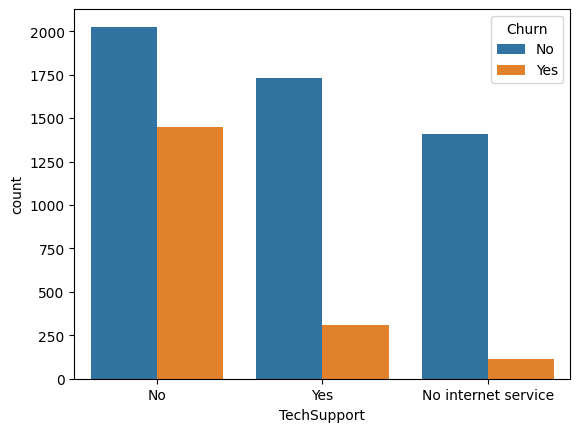

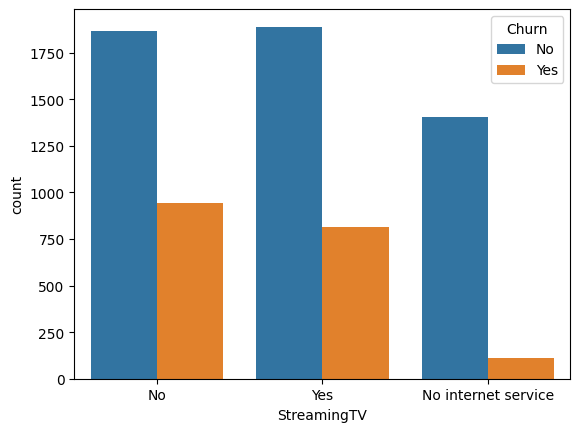

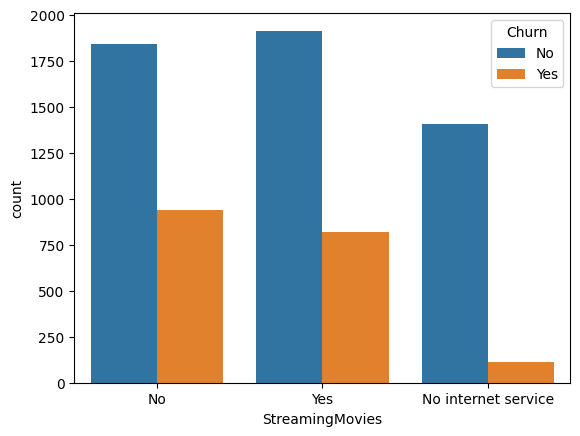

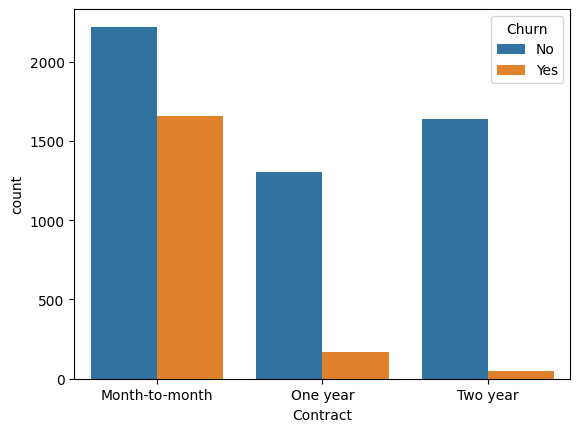

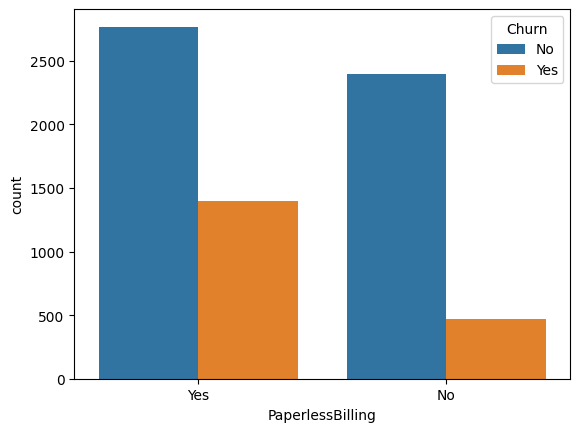

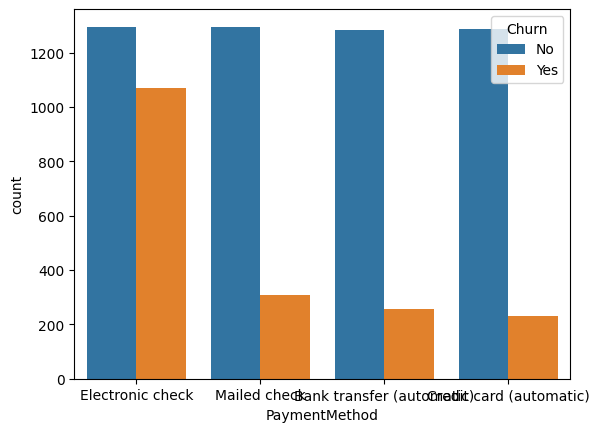

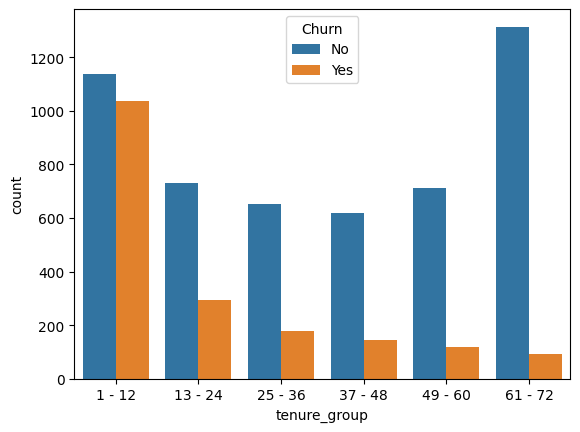

In [ ]:
#iterating over the dataframe from the dataframe deleting all the numerical columns and the churn column,
#because churn is my output thats y var that are dependent var, & total charges monthly charges are numerical attributes
#also senior citizen is numerical but is in  form of 0 and 1 so could be considered as categorical attributes

#doing countplot simply bar chart
#predictors here are all my columns, i is nothing but the index values, while hue is churn

for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges','MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=new_df, x=predictor, hue='Churn')

## Numerical Analysis

We do this kind of analysis with numerical attributes, single or multiple numerical attributes we have to perform some analysis.


In [ ]:
new_df.gender.value_counts()

,count
gender,
Male,3549
Female,3483


In [ ]:
#1.dividing the data into churn and active users accordingly as yes or no
#creating dataframe for people who are active, similarly for the churn

new_df1_target0=new_df[new_df['Churn']=='No']
new_df1_target1=new_df[new_df['Churn']=='Yes']

In [ ]:
#how does my gender look like for churned users
#so if we want to do univariate analysis using graphical or visual anayltics we can do, but without visual analytics we can do like this code and also including the next code


new_df1_target1.gender.value_counts()

,count
gender,
Female,939
Male,930


In [ ]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)  #basically tells that for bank transfer people who have churned are 258 and not churn are 1284

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In order to continue with the numerical analysis its better to convert the target variable into numerical attributes as well.

why we have done? because we be calling coorelation func and those staistical and mathematical func might not work with categorical data. so we conveeting into 1 and 0.

In [ ]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)

In [ ]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [ ]:
#converting all the categorical variables into dummy variables, now in feature encoding techniques, which includes multiple feature encoding techniques like label incoding one hot encoding, dummy incoding

#converting the dataframe into dummies, intially had less amount of columns now have 51 columns, because dummy variable has been created for each payment method.

new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


# **Relationship between monthly and total charges**

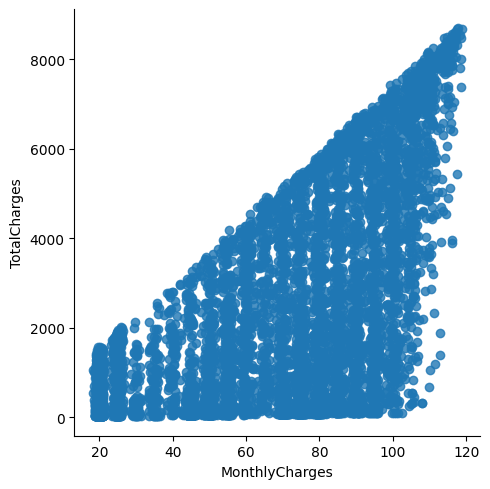

In [ ]:
#checking how its coorelated either positive or negative

#in most of the data point we can see the increasing trend

sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [ ]:
#calculating the coorelation between these two
#and we all know coorelation ranges from -1 to 1 in this case its almost 1 so its positively corelated
#so my insights will be, mtotal charges increase as monthly charges increase and vice versa



new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

np.float64(0.6510648032262027)

/tmp/ipython-input-3051056767.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 0)],  #calling monthly charges on active users
/tmp/ipython-input-3051056767.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 1)], #same as on churned users


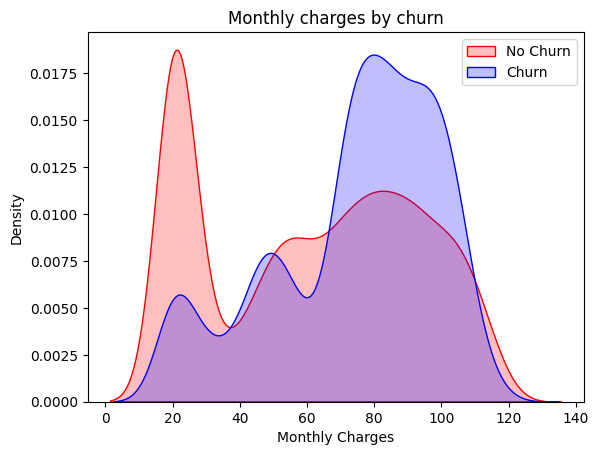

In [ ]:
#performing activities to plot some kernel density plots, churn by monthly charges and total charges
#calling seaborn kdeplot

Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 0)],  #calling monthly charges on active users
                  color="Red", shade=True)

Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 1)], #same as on churned users
                  color="Blue", shade=True)

Mth.legend(["No Churn", "Churn"], loc='upper right') #passing the legends
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.show()

#isight: churn is high when monthly charges are high, similar have to do for total charges too.

/tmp/ipython-input-4129152891.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 0)],
/tmp/ipython-input-4129152891.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 1)],


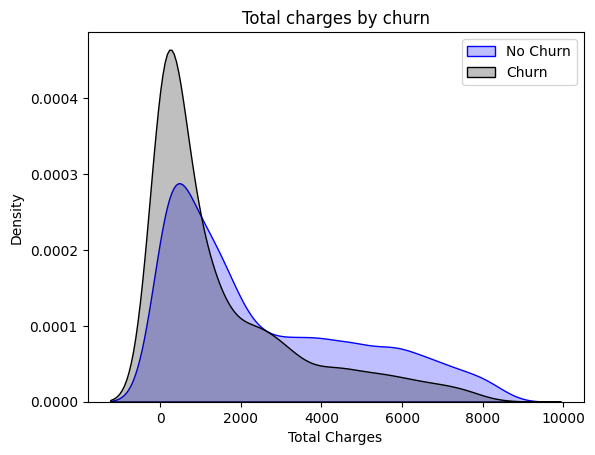

In [ ]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 0)],
                  color="Blue", shade=True)

Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 1)],
                  color="Black", shade=True)

Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')
plt.show()

#interesentingly we can see that the churn is high at less total charges, even though total charges & monthly charges are almost highly coorelated
#surprising higher churners at lower total charges

#however if we combine the isights of 3 parameters that is tenure monthly charges and total charges then the picture  is bit clear that higher monthly charges at lower tenure results into lower total charge. hence all these 3 factors are linked to high churn.

<Axes: >

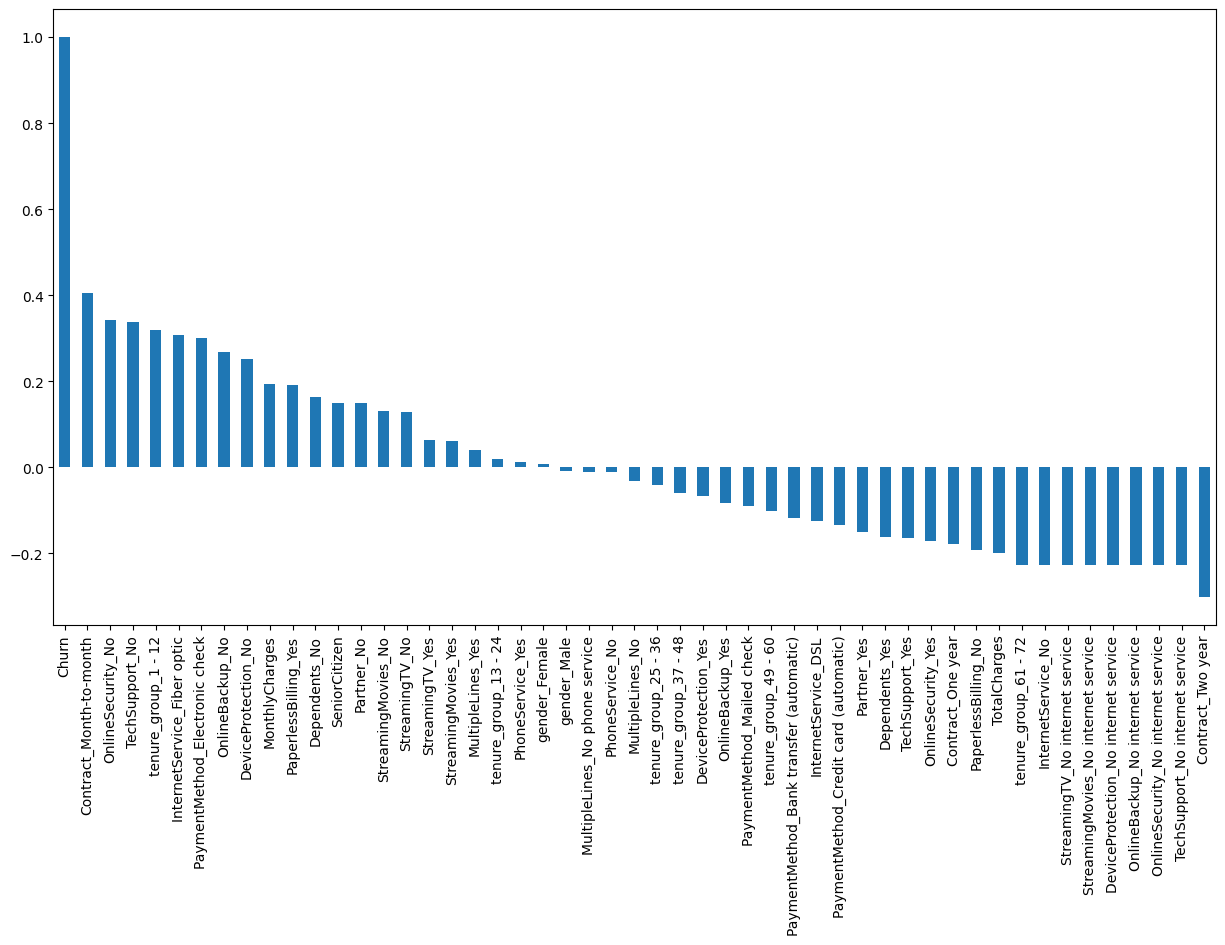

In [ ]:
#building a coorelation graph or coorelation metrics of all the x variables or precitors wrt to churn

plt.figure(figsize=(15,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar') #sorting the values with ascending equal to false which means descending ia true

#its telling the correlation between the target variable

In [ ]:
#so we set threshold by our choice lets suppose 0.2 so anything goes beyond 0.2 considered as important predictors, similarly a set of predictors that are negtively coorelated can help in model.

<Axes: >

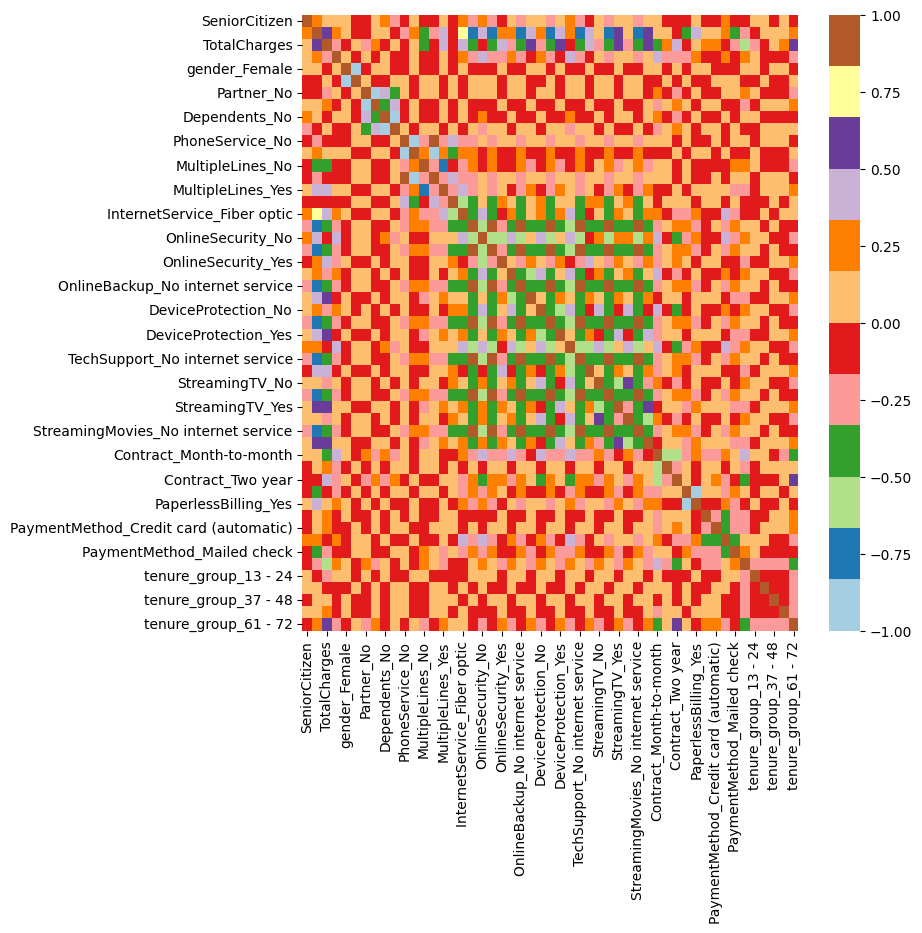

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(new_df_dummies.corr(), cmap='Paired')

#coorelation function with the entire dataframe

#heatmap tells the correlation between each and every features
#gives the insights about diff types of internships

# Bivariate Analysis

In [ ]:
# Import necessary libraries for building and evaluating the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y) for the model
# 'Churn' is the target variable we want to predict
X = new_df_dummies.drop(['Churn'], axis=1)  # Features are all columns except 'Churn'
y = new_df_dummies['Churn']                 # Target is the 'Churn' column

# Split the dataset into training and testing sets
# test_size=0.2 means 20% of data will be used for testing, and 80% for training
# random_state=42 ensures the split is the same each time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize and train the Logistic Regression model
# max_iter is increased to 1000 to potentially help with convergence
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the churn for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy*100:.2f}%\n")

print("Classification Report:")
# The classification report shows precision, recall, f1-score, and support for each class (churn/no churn)
print(classification_report(y_test, y_pred))

Prediction Accuracy: 78.39%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_train.shape

(4922, 50)

# Task
Improve the accuracy of the churn prediction model to over 90%.

## Address data imbalance

### Subtask:
Address the data imbalance in the `new_df_dummies` DataFrame by oversampling the minority class ('Yes' churn, which is represented as 1 in the 'Churn' column) using the SMOTE technique.


**Reasoning**:
Import the SMOTE library and apply oversampling to the dataset to address the class imbalance.



In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = new_df_dummies.drop('Churn', axis=1)
y = new_df_dummies['Churn']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


## Try different models

### Subtask:
Train and evaluate a Random Forest model on the SMOTE-resampled data.


**Reasoning**:
Train and evaluate a Random Forest model on the SMOTE-resampled data to improve the accuracy of churn prediction.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Instantiate a Random Forest Classifier model
model_rf = RandomForestClassifier(random_state=42)

# Train the Random Forest model using the training data
model_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_resampled)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test_resampled, y_pred_rf)
print(f"Random Forest Model Accuracy on Resampled Data: {accuracy_rf*100:.2f}%\n")

print("Random Forest Classification Report on Resampled Data:")
print(classification_report(y_test_resampled, y_pred_rf))

Random Forest Model Accuracy on Resampled Data: 85.41%

Random Forest Classification Report on Resampled Data:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1563
           1       0.87      0.83      0.85      1535

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



## Try different models

### Subtask:
Train and evaluate a Gradient Boosting model on the SMOTE-resampled data.


**Reasoning**:
Train and evaluate a Gradient Boosting model on the SMOTE-resampled data.



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate a Gradient Boosting Classifier model
model_gb = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model using the training data
model_gb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_gb = model_gb.predict(X_test_resampled)

# Evaluate the model's performance
accuracy_gb = accuracy_score(y_test_resampled, y_pred_gb)
print(f"Gradient Boosting Model Accuracy on Resampled Data: {accuracy_gb*100:.2f}%\n")

print("Gradient Boosting Classification Report on Resampled Data:")
print(classification_report(y_test_resampled, y_pred_gb))

Gradient Boosting Model Accuracy on Resampled Data: 85.93%

Gradient Boosting Classification Report on Resampled Data:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1563
           1       0.86      0.86      0.86      1535

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098



## Try different models

### Subtask:
Train and evaluate a Support Vector Machine (SVM) model on the SMOTE-resampled data.


**Reasoning**:
Train and evaluate an SVM model on the SMOTE-resampled data.



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Instantiate an SVM model
model_svm = SVC(kernel='linear', random_state=42)

# Train the SVM model using the resampled training data
model_svm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the resampled test set
y_pred_svm = model_svm.predict(X_test_resampled)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test_resampled, y_pred_svm)
print(f"SVM Model Accuracy on Resampled Data: {accuracy_svm*100:.2f}%\n")

print("SVM Classification Report on Resampled Data:")
print(classification_report(y_test_resampled, y_pred_svm))

SVM Model Accuracy on Resampled Data: 84.51%

SVM Classification Report on Resampled Data:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1563
           1       0.90      0.77      0.83      1535

    accuracy                           0.85      3098
   macro avg       0.85      0.84      0.84      3098
weighted avg       0.85      0.85      0.84      3098



## Hyperparameter tuning

### Subtask:
Tune the hyperparameters of the best performing model so far to potentially improve its accuracy.


**Reasoning**:
Identify the best performing model, choose hyperparameters, define parameter grid, use GridSearchCV to find optimal hyperparameters and fit to the resampled training data. Then evaluate on the resampled test data, print accuracy, classification report, and best hyperparameters.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Identify the best performing model: Gradient Boosting had the highest accuracy at 85.93%
# Hyperparameters to tune for GradientBoostingClassifier: n_estimators, learning_rate, max_depth
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Use GridSearchCV to find the optimal hyperparameters
grid_search = GridSearchCV(estimator=model_gb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the tuning process to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_model_gb = grid_search.best_estimator_

# Predict on the resampled test set
y_pred_tuned_gb = best_model_gb.predict(X_test_resampled)

# Evaluate the tuned model performance
accuracy_tuned_gb = accuracy_score(y_test_resampled, y_pred_tuned_gb)
print(f"Tuned Gradient Boosting Model Accuracy on Resampled Data: {accuracy_tuned_gb*100:.2f}%\n")

print("Tuned Gradient Boosting Classification Report on Resampled Data:")
print(classification_report(y_test_resampled, y_pred_tuned_gb))

# Print the best hyperparameters found
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

Tuned Gradient Boosting Model Accuracy on Resampled Data: 85.93%

Tuned Gradient Boosting Classification Report on Resampled Data:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1563
           1       0.86      0.86      0.86      1535

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098

Best hyperparameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


## Summary:

### Data Analysis Key Findings

*   Data imbalance was addressed using SMOTE, resulting in an equal distribution of both churn and non-churn classes (5163 instances each).
*   Three different classification models were evaluated on the SMOTE-resampled data:
    *   Random Forest achieved an accuracy of 85.41%.
    *   Gradient Boosting achieved an accuracy of 85.93%.
    *   Support Vector Machine (SVM) with a linear kernel achieved an accuracy of 84.51%.
*   Hyperparameter tuning was performed on the Gradient Boosting model (the best performing model). The tuning process using GridSearchCV found optimal hyperparameters (`learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100) but did not improve the accuracy, which remained at 85.93%.

### Insights or Next Steps

*   While data imbalance was addressed, the target accuracy of over 90% was not achieved by the evaluated models. Further exploration of more complex models or feature engineering could be beneficial.
*   Investigate alternative oversampling or undersampling techniques, or explore ensemble methods that combine the predictions of multiple models to potentially improve accuracy.
